In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

/tmp/ipykernel_74264/3522498266.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x = df.drop(columns=['math_score'])
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
y = df.math_score
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
num_features = x.select_dtypes(exclude='O').columns
cat_features = x.select_dtypes(include='O').columns

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [9]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()


processor = ColumnTransformer(
    [
        ('StandardScaler', num_transformer, num_features),
        ('OneHotEncoder', cat_transformer, cat_features)
    ]
)

In [10]:
x = processor.fit_transform(x)
x

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [11]:
x.shape

(1000, 19)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=40, test_size=.2)

In [13]:
x_train.shape

(800, 19)

In [14]:
def model_evaluation(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    return mae, rmse, r2

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Dession Tree Regressor': DecisionTreeRegressor(),
    'Ada Boost Regressor': AdaBoostRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'XGBRegressor': XGBRegressor(),
    'Cat Boost Regressor': CatBoostRegressor(verbose=False)
}

In [16]:
for model_name, Model in models.items():
    Model.fit(x_train, y_train)

    y_train_predict = Model.predict(x_train)
    y_test_predict = Model.predict(x_test)


    y_train_mae, y_train_rmse, y_train_r2 = model_evaluation(y_train, y_train_predict)
    y_test_mae, y_test_rmse, y_test_r2 = model_evaluation(y_test, y_test_predict)

    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(y_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(y_train_mae))
    print("- R2 Score: {:.4f}".format(y_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(y_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(y_test_mae))
    print("- R2 Score: {:.4f}".format(y_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2568
- Mean Absolute Error: 4.1838
- R2 Score: 0.8810
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6593
- Mean Absolute Error: 4.5371
- R2 Score: 0.8538




Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2537
- Mean Absolute Error: 1.7705
- R2 Score: 0.9781
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3221
- Mean Absolute Error: 5.1068
- R2 Score: 0.8176


K Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7814
- Mean Absolute Error: 4.5878
- R2 Score: 0.8561
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5103
- Mean Absolute Error: 5.0740
- R2 Score: 0.8066


Dession Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2500
- Mean Absolute Error: 0.0125
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.9944
- Mean Absolute Error: 6.4000
- R2 Score: 0.7083


Ada Boost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8037
- Mean Absolute Error: 4.7218
- R2 

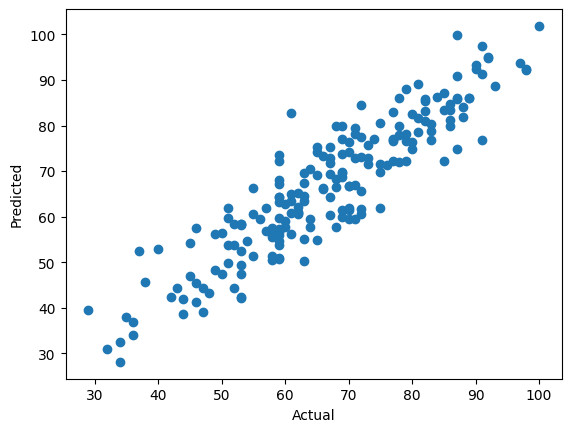

In [18]:
plt.scatter(y_test,y_test_predict);
plt.xlabel('Actual');
plt.ylabel('Predicted');

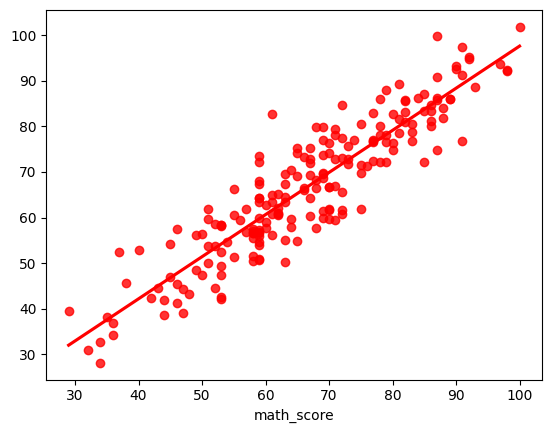

In [21]:
import seaborn as sns
sns.regplot(x=y_test,y=y_test_predict,ci=None,color ='red');

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_predict,'Difference':y_test-y_test_predict})
pred_df

,Actual Value,Predicted Value,Difference
204,59,50.941240,8.058760
71,63,67.285680,-4.285680
594,92,95.120914,-3.120914
672,69,68.776103,0.223897
14,50,47.505723,2.494277
...,...,...,...
647,64,59.585331,4.414669
797,70,76.297182,-6.297182
605,75,71.489911,3.510089
611,58,56.964113,1.035887
